# Tohoku Earthquake Dataset

In [1]:
%matplotlib nbagg

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib import style

## 1. Data cleaning

### 1.1 Detector station location data

In [3]:
# read in location data
locations = pd.read_table("data/location.txt", names = ["lon", "lat", "data1", "data2"])

In [4]:
locations.head()

,lon,lat,data1,data2
0,-98.683,27.065,1,#
1,-98.102,26.938,1,#
2,-98.068,26.463,1,#
3,-117.110,32.889,1,#
4,-107.790,32.532,1,#


In [5]:
# keep only relevant data (longitude and latitude)
locations.drop(["data1", "data2"], inplace=True, axis=1)

In [6]:
locations.head()

,lon,lat
0,-98.683,27.065
1,-98.102,26.938
2,-98.068,26.463
3,-117.110,32.889
4,-107.790,32.532


In [7]:
locations.loc[1]

lon   -98.102
lat    26.938
Name: 1, dtype: float64

### Location of Tohoku earthquake
According to NASA's [Earth Observertory website](https://earthobservatory.nasa.gov/images/49621), the Tohoku earthquake struck Japan at "at 38.3 degrees North latitude and 142.4 degrees East longitude." Based on this information, we set the center location of Tohoku earthquake accordingly (Longitude, Latitude).

In [8]:
# center point of the tohoku earthquake
earthquake = (-142.4, 38.3)

In [9]:
# calculate distance between each detector station and Tohoku earthquake location 
# on a sphere given their longitudes and latitudes.
from haversine import haversine
locations['distance'] = [haversine(locations.loc[i], earthquake) for i in locations.index]

In [10]:
# name index column
locations.index.name = "station"

In [11]:
locations.head()

,lon,lat,distance
station,,,
0,-98.683,27.065,4882.202882
1,-98.102,26.938,4945.643921
2,-98.068,26.463,4951.013870
3,-117.110,32.889,2836.018544
4,-107.790,32.532,3862.182187


In [12]:
sorted_locations = locations.sort_values(by=["distance"])

In [13]:
sorted_locations.head()

,lon,lat,distance
station,,,
211,-123.93,43.161,2085.521385
193,-123.85,44.106,2107.533459
228,-123.67,42.696,2108.169394
244,-123.60,42.158,2110.018927
194,-123.35,43.697,2155.636091


In [14]:
sorted_locations.index

Int64Index([211, 193, 228, 244, 194, 288, 257, 165, 272, 151,
            ...
             63,  50, 121, 359, 375, 242, 286, 269, 304, 287],
           dtype='int64', name='station', length=438)

### 1.2 Detector stations time and magnitude data from Tohoku Earthquake

In [15]:
# read in time & magnitude data 
time_magnitude = pd.read_csv("data/data_tohoku_norm_transpose.csv", header=None)

As each row in this dataset corresponds to the magnitude data for each second increment after the Earthquake happened, we create a date range to get time for 4 hours with the frequency 1 second each according to the 14401 seconds of recording earthquake data.

According to NASA's [Earth Observertory website](https://earthobservatory.nasa.gov/images/49621), the Tohoku earthquake struck Japan at "2:46 p.m. local time (05:46 Universal Time, or UTC)."

In [16]:
time_range = pd.timedelta_range(start="17:46:00", periods=14401, freq="S")

In [17]:
time_range

TimedeltaIndex(['17:46:00', '17:46:01', '17:46:02', '17:46:03', '17:46:04',
                '17:46:05', '17:46:06', '17:46:07', '17:46:08', '17:46:09',
                ...
                '21:45:51', '21:45:52', '21:45:53', '21:45:54', '21:45:55',
                '21:45:56', '21:45:57', '21:45:58', '21:45:59', '21:46:00'],
               dtype='timedelta64[ns]', length=14401, freq='S')

In [18]:
time_magnitude['time'] = time_range
time_magnitude.set_index('time', inplace=True)
time_magnitude.head()

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
time,,,,,,,,,,,,,,,,,,,,,
17:46:00,-0.000255,-0.000068,0.000406,-0.000275,0.000070,0.000041,-0.000070,-0.000040,0.000152,0.000039,...,-0.000156,0.000025,0.000064,0.000047,0.000030,0.000080,0.000051,0.000156,0.000282,-0.000024
17:46:01,-0.000238,-0.000085,0.000411,-0.000293,0.000085,0.000058,-0.000027,-0.000042,0.000141,0.000151,...,-0.000118,0.000127,0.000029,0.000056,0.000093,0.000016,0.000016,0.000056,0.000280,-0.000036
17:46:02,-0.000220,-0.000102,0.000413,-0.000308,0.000099,0.000073,0.000015,-0.000042,0.000129,0.000259,...,-0.000080,0.000225,-0.000005,0.000065,0.000153,-0.000046,-0.000019,-0.000042,0.000275,-0.000049
17:46:03,-0.000203,-0.000117,0.000411,-0.000321,0.000111,0.000087,0.000055,-0.000042,0.000116,0.000360,...,-0.000043,0.000316,-0.000037,0.000073,0.000208,-0.000106,-0.000052,-0.000135,0.000269,-0.000060
17:46:04,-0.000186,-0.000130,0.000406,-0.000330,0.000122,0.000099,0.000092,-0.000041,0.000103,0.000451,...,-0.000009,0.000398,-0.000067,0.000080,0.000257,-0.000160,-0.000083,-0.000220,0.000261,-0.000071


In [19]:
# reorder stations based on their distance from earthquake location
time_magnitude = time_magnitude[sorted_locations.index]

In [20]:
time_magnitude.head()

,211,193,228,244,194,288,257,165,272,151,...,63,50,121,359,375,242,286,269,304,287
time,,,,,,,,,,,,,,,,,,,,,
17:46:00,-0.001273,0.002861,0.000524,-0.000501,0.000636,0.000211,-0.000090,0.000501,-0.000291,-0.000892,...,NaN,-0.000249,-0.000137,0.000077,-0.000191,0.002128,0.000049,0.000025,-0.000400,0.000063
17:46:01,-0.001865,0.003157,0.000142,-0.000291,0.000863,0.000425,-0.000125,0.000159,-0.000324,-0.001083,...,NaN,-0.000256,-0.000088,0.000217,0.000294,0.001515,0.000009,-0.000152,0.000151,-0.000126
17:46:02,-0.002425,0.003419,-0.000229,-0.000084,0.001077,0.000629,-0.000157,-0.000176,-0.000352,-0.001258,...,NaN,-0.000261,-0.000039,0.000351,0.000764,0.000905,-0.000029,-0.000323,0.000685,-0.000309
17:46:03,-0.002937,0.003642,-0.000577,0.000114,0.001272,0.000818,-0.000186,-0.000493,-0.000377,-0.001414,...,NaN,-0.000263,0.000008,0.000476,0.001206,0.000318,-0.000067,-0.000482,0.001187,-0.000480
17:46:04,-0.003392,0.003827,-0.000895,0.000298,0.001443,0.000985,-0.000212,-0.000787,-0.000397,-0.001546,...,NaN,-0.000263,0.000052,0.000588,0.001610,-0.000232,-0.000103,-0.000627,0.001645,-0.000635


In [21]:
time_magnitude.transpose().head()

time,0 days 17:46:00,0 days 17:46:01,0 days 17:46:02,0 days 17:46:03,0 days 17:46:04,0 days 17:46:05,0 days 17:46:06,0 days 17:46:07,0 days 17:46:08,0 days 17:46:09,...,0 days 21:45:51,0 days 21:45:52,0 days 21:45:53,0 days 21:45:54,0 days 21:45:55,0 days 21:45:56,0 days 21:45:57,0 days 21:45:58,0 days 21:45:59,0 days 21:46:00
211,-0.001273,-0.001865,-0.002425,-0.002937,-0.003392,-0.003784,-0.004108,-0.004366,-0.004560,-0.004694,...,-0.013844,-0.013124,-0.012316,-0.011433,-0.010486,-0.009486,-0.008445,-0.007381,-0.006317,-0.005281
193,0.002861,0.003157,0.003419,0.003642,0.003827,0.003970,0.004070,0.004127,0.004146,0.004133,...,-0.005995,-0.005475,-0.004947,-0.004422,-0.003909,-0.003413,-0.002940,-0.002495,-0.002083,-0.001708
228,0.000524,0.000142,-0.000229,-0.000577,-0.000895,-0.001178,-0.001424,-0.001633,-0.001803,-0.001934,...,-0.008748,-0.008139,-0.007482,-0.006800,-0.006112,-0.005438,-0.004787,-0.004167,-0.003580,0.000000
244,-0.000501,-0.000291,-0.000084,0.000114,0.000298,0.000466,0.000615,0.000743,0.000848,0.000931,...,-0.020508,-0.019742,-0.018736,-0.017520,-0.016130,-0.014607,-0.012998,-0.011348,-0.009700,0.000000
194,0.000636,0.000863,0.001077,0.001272,0.001443,0.001589,0.001710,0.001807,0.001880,0.001928,...,0.007495,0.006712,0.005956,0.005234,0.004549,0.003900,0.003288,0.002712,0.002178,0.001692


### Data Normalization: We normalize the magnitude in range [0,1]

In [22]:
time_magnitude.head()

,211,193,228,244,194,288,257,165,272,151,...,63,50,121,359,375,242,286,269,304,287
time,,,,,,,,,,,,,,,,,,,,,
17:46:00,-0.001273,0.002861,0.000524,-0.000501,0.000636,0.000211,-0.000090,0.000501,-0.000291,-0.000892,...,NaN,-0.000249,-0.000137,0.000077,-0.000191,0.002128,0.000049,0.000025,-0.000400,0.000063
17:46:01,-0.001865,0.003157,0.000142,-0.000291,0.000863,0.000425,-0.000125,0.000159,-0.000324,-0.001083,...,NaN,-0.000256,-0.000088,0.000217,0.000294,0.001515,0.000009,-0.000152,0.000151,-0.000126
17:46:02,-0.002425,0.003419,-0.000229,-0.000084,0.001077,0.000629,-0.000157,-0.000176,-0.000352,-0.001258,...,NaN,-0.000261,-0.000039,0.000351,0.000764,0.000905,-0.000029,-0.000323,0.000685,-0.000309
17:46:03,-0.002937,0.003642,-0.000577,0.000114,0.001272,0.000818,-0.000186,-0.000493,-0.000377,-0.001414,...,NaN,-0.000263,0.000008,0.000476,0.001206,0.000318,-0.000067,-0.000482,0.001187,-0.000480
17:46:04,-0.003392,0.003827,-0.000895,0.000298,0.001443,0.000985,-0.000212,-0.000787,-0.000397,-0.001546,...,NaN,-0.000263,0.000052,0.000588,0.001610,-0.000232,-0.000103,-0.000627,0.001645,-0.000635


In [23]:
# check any null value
bool_nan = time_magnitude.isnull().any()

# find out which station's column contains NaN value
bool_nan[bool_nan == True].index[0]

63

In [24]:
# the result shows the whole column of station63 contains NaN value
time_magnitude[63].isnull().sum()

14401

In [25]:
# find column index of station 63
iloc_nan = sorted_locations.index.get_loc(63)
iloc_nan

428

In [26]:
# find adjacent stations of station 63 in order to set values to station 63 with the average values of adjacent ones
time_magnitude.iloc[:,428] = (time_magnitude.iloc[:, 427] + time_magnitude.iloc[:, 429])/2

In [27]:
time_magnitude.iloc[:,427:430].head()

,49,63,50
time,,,
17:46:00,-0.000035,-0.000142,-0.000249
17:46:01,-0.000105,-0.000181,-0.000256
17:46:02,-0.000172,-0.000217,-0.000261
17:46:03,-0.000235,-0.000249,-0.000263
17:46:04,-0.000290,-0.000277,-0.000263


In [28]:
# sanity check for null value
time_magnitude.isnull().any().any()

False

In [29]:
# normalize magnitude in range [0.1]
min_val = time_magnitude.min(skipna=True).min()
max_val = time_magnitude.max(skipna=True).max()
norm_time_magnitude = (time_magnitude - min_val)/(max_val - min_val)

In [30]:
norm_time_magnitude.head()

,211,193,228,244,194,288,257,165,272,151,...,63,50,121,359,375,242,286,269,304,287
time,,,,,,,,,,,,,,,,,,,,,
17:46:00,0.623412,0.624967,0.624088,0.623702,0.624130,0.623970,0.623856,0.624079,0.623781,0.623555,...,0.623837,0.623797,0.623839,0.623919,0.623819,0.624691,0.623909,0.623900,0.623740,0.623914
17:46:01,0.623189,0.625078,0.623944,0.623781,0.624215,0.624050,0.623844,0.623950,0.623769,0.623483,...,0.623823,0.623794,0.623857,0.623972,0.624001,0.624460,0.623894,0.623833,0.623947,0.623843
17:46:02,0.622979,0.625176,0.623804,0.623859,0.624296,0.624127,0.623831,0.623824,0.623758,0.623417,...,0.623809,0.623792,0.623876,0.624023,0.624178,0.624231,0.623879,0.623769,0.624148,0.623774
17:46:03,0.622786,0.625260,0.623673,0.623933,0.624369,0.624198,0.623820,0.623705,0.623749,0.623359,...,0.623797,0.623791,0.623894,0.624069,0.624344,0.624010,0.623865,0.623709,0.624337,0.623710
17:46:04,0.622615,0.625330,0.623554,0.624003,0.624433,0.624261,0.623811,0.623595,0.623741,0.623309,...,0.623786,0.623791,0.623910,0.624111,0.624496,0.623803,0.623852,0.623655,0.624509,0.623652


## 2. Create spectrogram

<IPython.core.display.Javascript object>


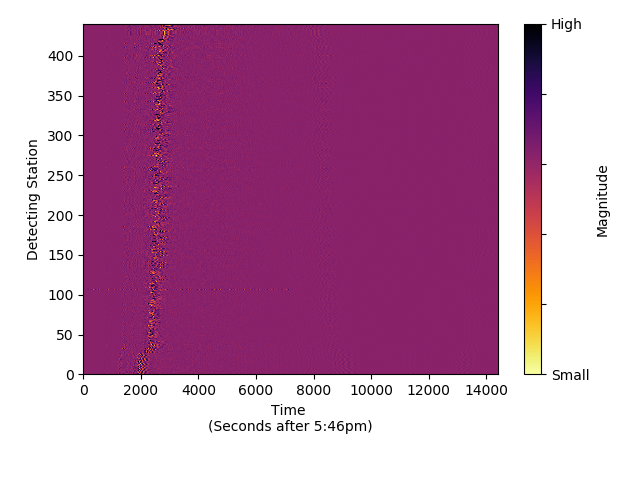

In [37]:
#style.use('fivethirtyeight')
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
spect = plt.imshow(norm_time_magnitude.transpose(), aspect='auto', cmap='inferno_r')
cbar = fig.colorbar(spect, ax=ax1, ticks = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], label="Magnitude")
cbar.ax.set_yticklabels(['Small','','','','','High'])

# for label in ax1.xaxis.get_ticklabels():
#     label.set_rotation(45)

#ax1.set_xticklabels(norm_time_magnitude.transpose().columns, rotation=45)

ax1.set_xlim(0, len(norm_time_magnitude))
ax1.set_ylim(0,440)
plt.ylabel('Detecting Station')
plt.xlabel('Time \n(Seconds after 5:46pm)')
plt.subplots_adjust(left=0.13, bottom=0.22, right=0.94, top=0.95, wspace=0.2, hspace=0)
#plt.title('Tohoku Earthquake happened at\n5:46pm(UTC)', fontsize=13)
plt.grid(False)